In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import RandomOverSampler

In [2]:
data = pd.read_csv("Cancer_Data.csv").drop('Unnamed: 32', axis=1)

In [3]:
data.shape

(569, 32)

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
data = data.drop('id', axis=1)

In [6]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
data.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [8]:
X = data.drop('diagnosis', axis=1)
Y = data['diagnosis']


Removing the outliers won't work because a large portion of the dataset will be lost

In [9]:
# for col in X:
#     mean = X[col].mean()
#     std = X[col].std()
#     low_treshold = mean - (2 * std)
#     high_treshold = mean + (2 * std)
#     data = data[(data[col] > low_treshold) & (data[col] < high_treshold)]

#data.shape

Transforming the data.

I used the shapiro's test to check wheter normal distribution exists or not

In [10]:
for col in X:
    stat, p = shapiro(X[col])

    if p > 0.05:
        print('The data is likely normal in column ' + col)
    else:
        print('The data is likely not normal in column ' + col)

The data is likely not normal in column radius_mean
The data is likely not normal in column texture_mean
The data is likely not normal in column perimeter_mean
The data is likely not normal in column area_mean
The data is likely not normal in column smoothness_mean
The data is likely not normal in column compactness_mean
The data is likely not normal in column concavity_mean
The data is likely not normal in column concave points_mean
The data is likely not normal in column symmetry_mean
The data is likely not normal in column fractal_dimension_mean
The data is likely not normal in column radius_se
The data is likely not normal in column texture_se
The data is likely not normal in column perimeter_se
The data is likely not normal in column area_se
The data is likely not normal in column smoothness_se
The data is likely not normal in column compactness_se
The data is likely not normal in column concavity_se
The data is likely not normal in column concave points_se
The data is likely not 

In the following code, I will run a for loop through a temporary dataframe that is a copy of X and I will apply the box cox transformation to all of them.

In [11]:
for col in X:    
    X[col], _ = stats.boxcox(X[col] + 1)

Plotting the newly transformed data

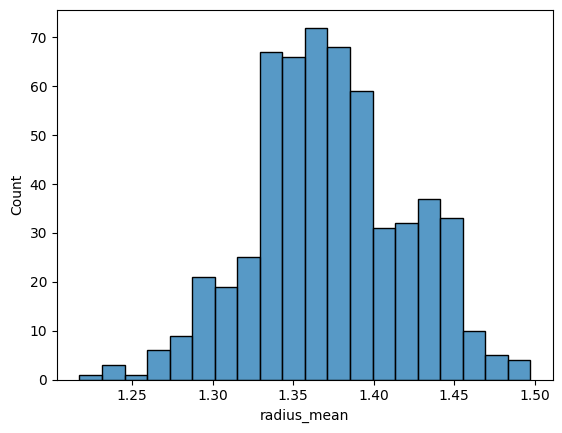

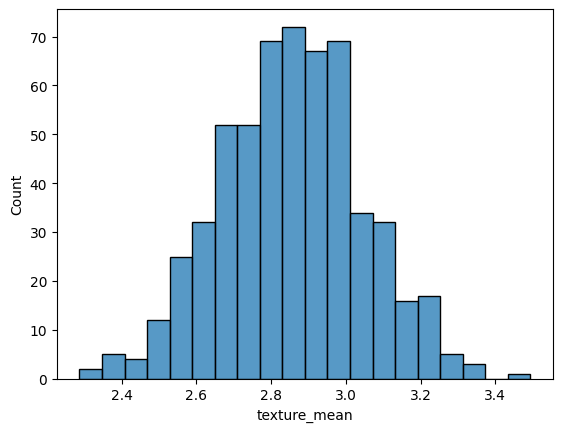

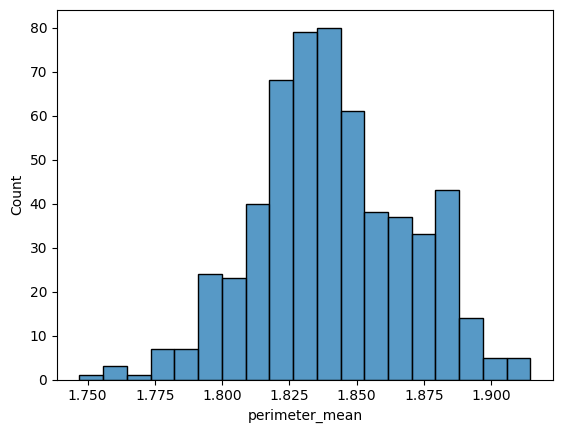

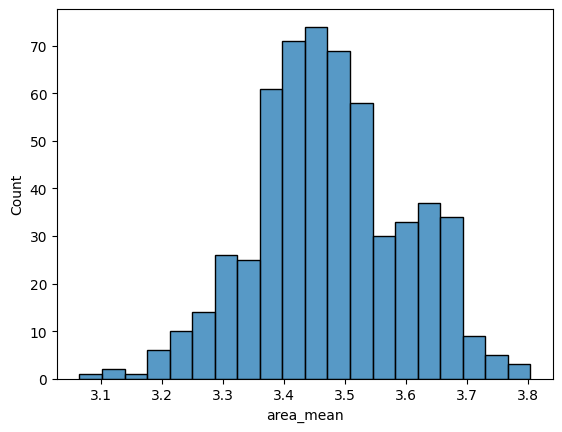

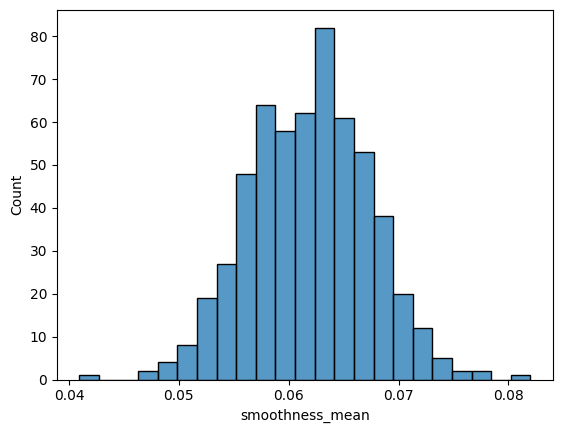

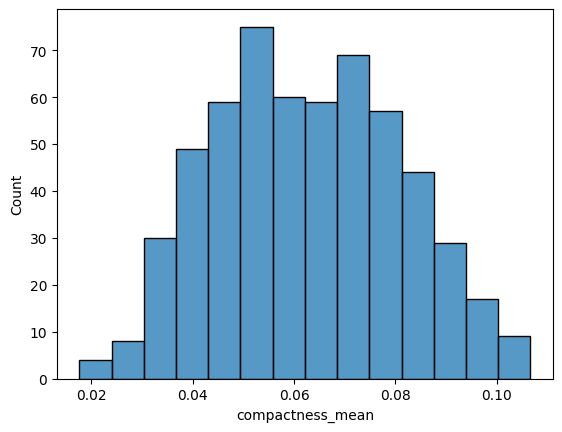

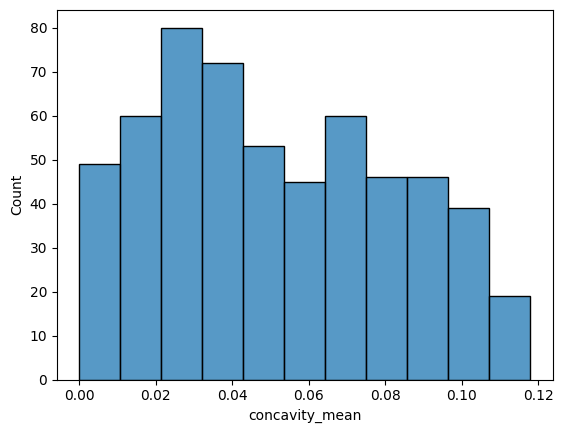

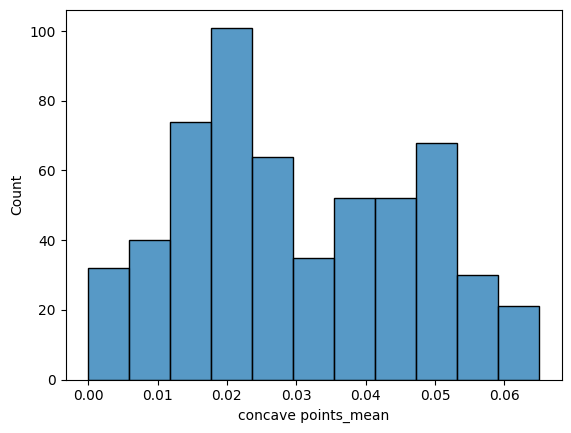

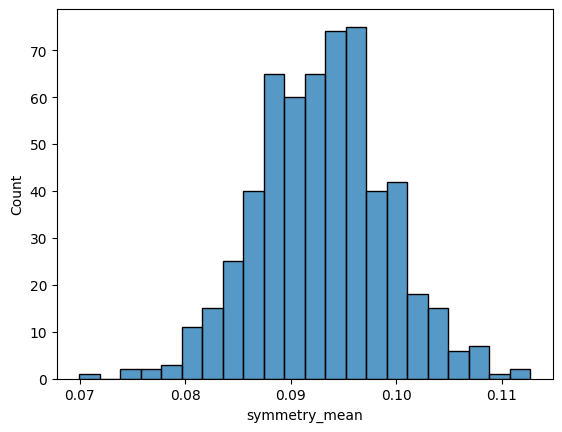

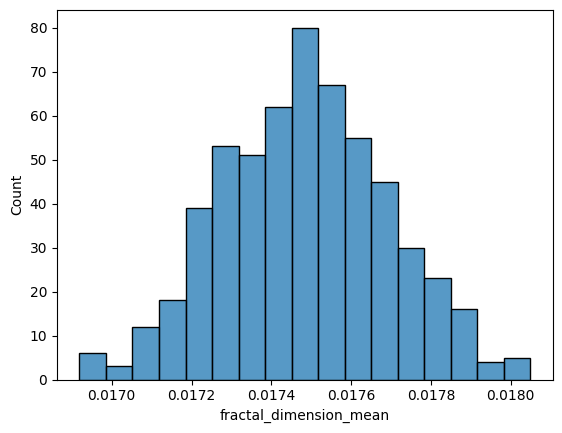

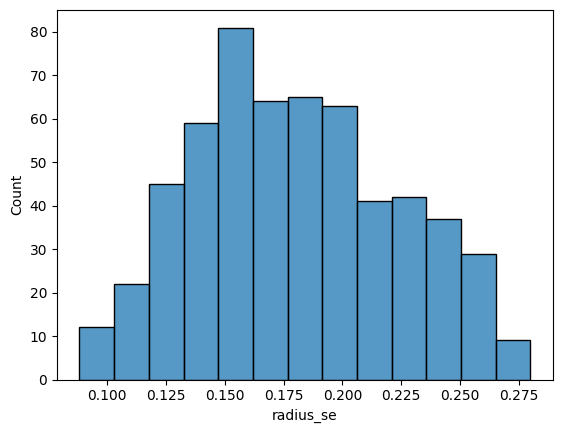

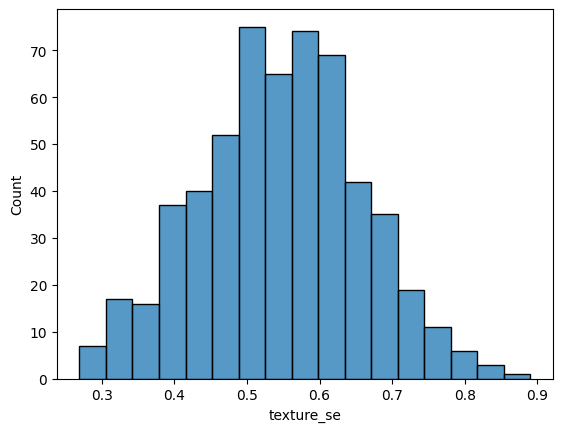

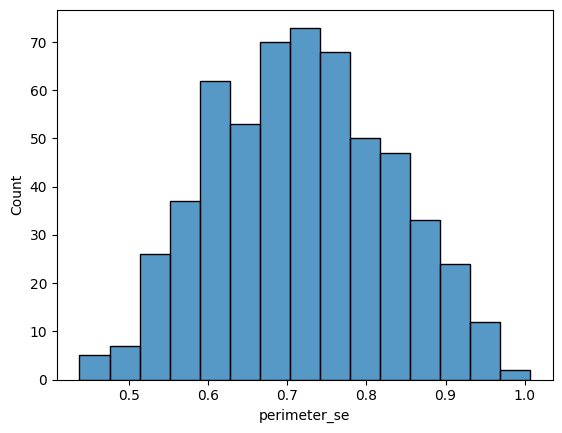

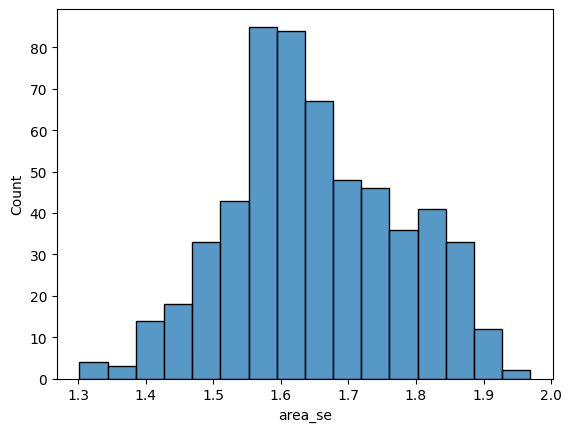

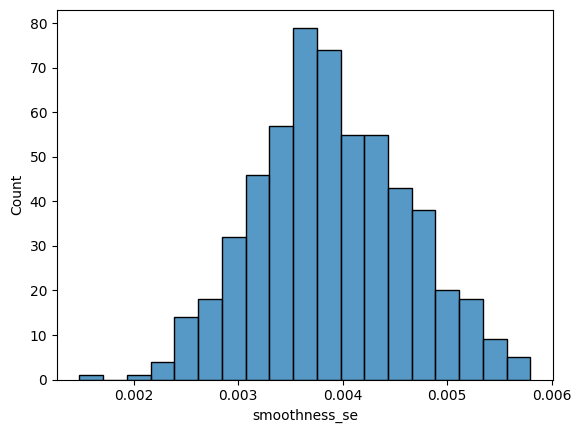

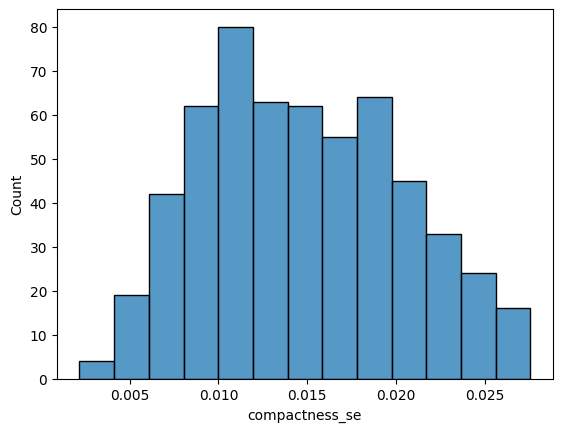

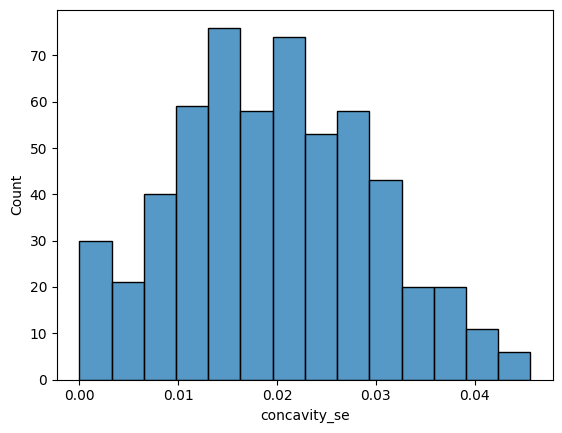

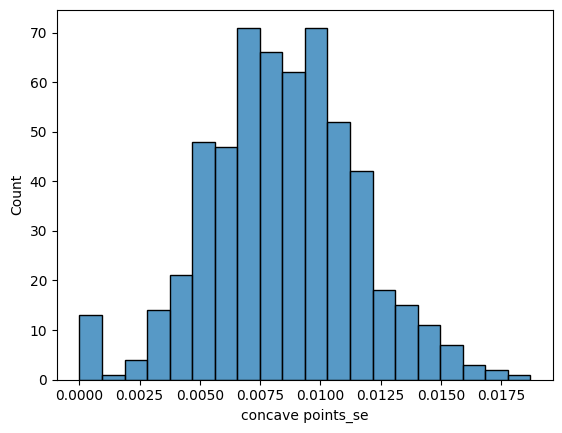

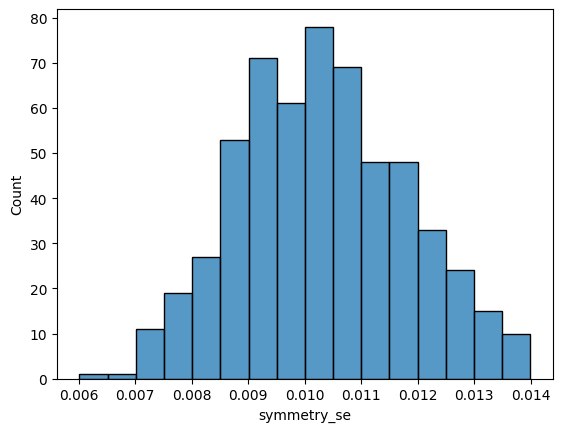

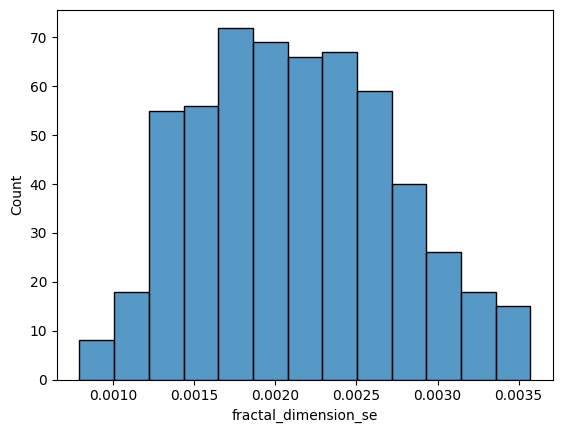

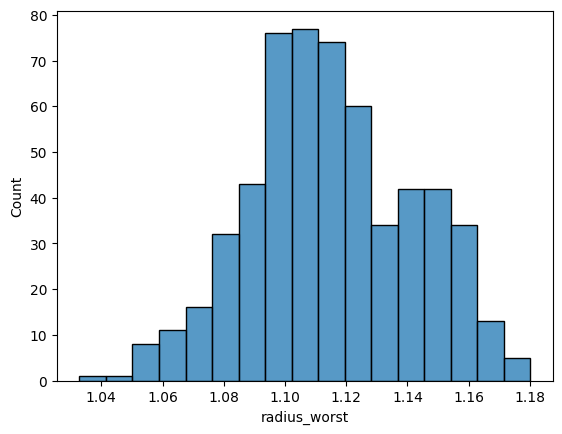

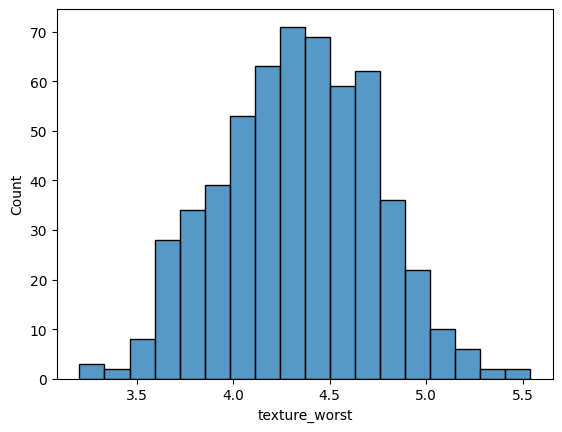

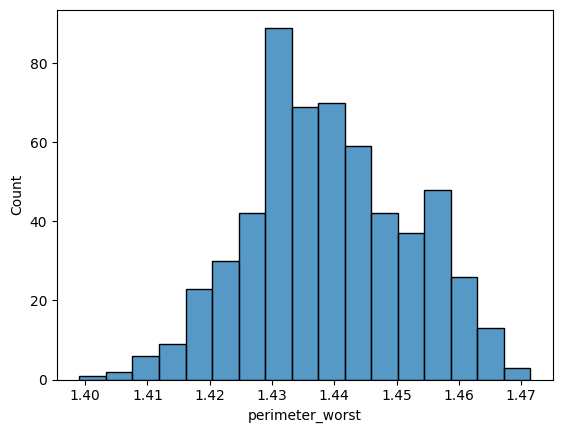

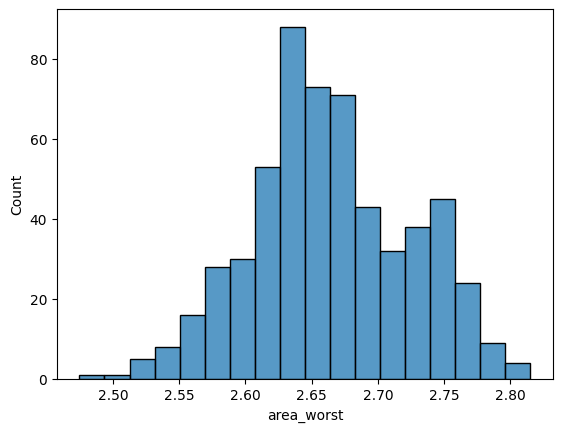

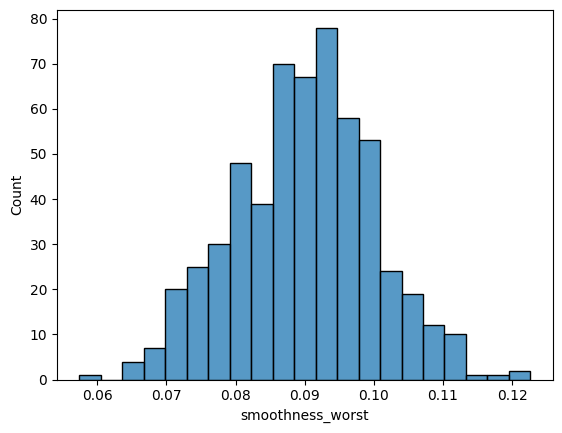

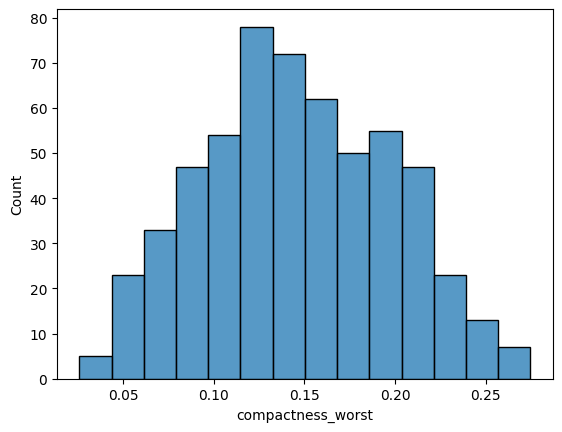

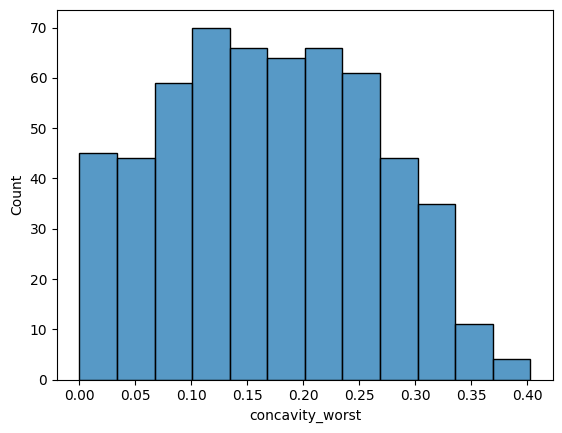

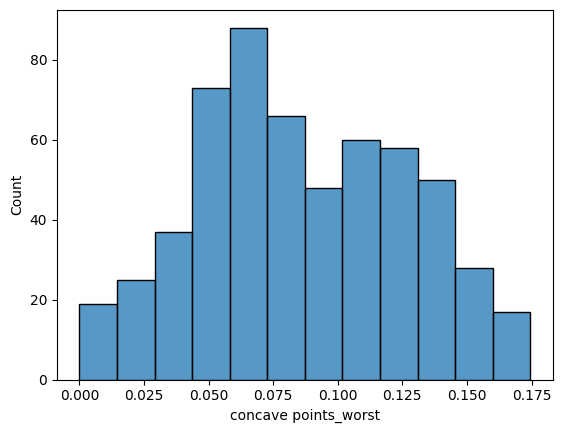

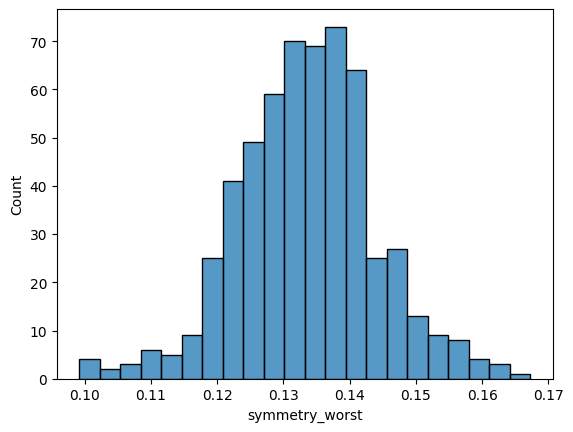

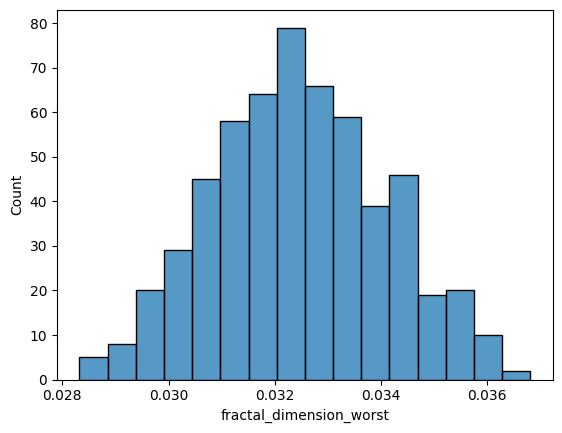

In [12]:
for i in X:
    sns.histplot(data=X[i])
    plt.show()

In [13]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.426550,2.343281,1.876547,3.613776,0.070083,0.101601,0.109906,0.060231,0.105084,0.017878,...,1.158483,3.744430,1.462758,2.762819,0.102942,0.246529,0.330188,0.165413,0.156333,0.035257
1,1.449486,2.804129,1.884157,3.676200,0.057400,0.055518,0.060872,0.043470,0.093627,0.017286,...,1.157391,4.221284,1.457806,2.760299,0.086582,0.130681,0.175849,0.131488,0.132259,0.033336
2,1.442169,2.959161,1.882061,3.655007,0.067136,0.083494,0.095570,0.057534,0.099096,0.017424,...,1.153153,4.364257,1.456390,2.749264,0.095794,0.208606,0.262788,0.156753,0.146170,0.033201
3,1.336875,2.922877,1.826324,3.372380,0.077054,0.102178,0.103021,0.053293,0.107606,0.018050,...,1.113062,4.426520,1.438644,2.638023,0.118967,0.264094,0.325063,0.162433,0.167263,0.036542
4,1.447209,2.619135,1.885703,3.671424,0.063752,0.076237,0.095689,0.053096,0.093557,0.017378,...,1.149792,3.685015,1.456320,2.742346,0.092783,0.139205,0.245300,0.119509,0.123731,0.032014


In [14]:
X.isna().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Scaling the data to fit the model

In [15]:
scaler = MinMaxScaler()
for col in X:
    X[col] = scaler.fit_transform(X[[col]])

In [16]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.747299,0.046701,0.772944,0.742563,0.709664,0.943875,0.931423,0.926537,0.821907,0.848371,...,0.852934,0.231262,0.879387,0.846608,0.698073,0.886763,0.819862,0.947632,0.839369,0.816728
1,0.829199,0.428532,0.818333,0.827003,0.400678,0.425554,0.515874,0.668701,0.553689,0.324283,...,0.845519,0.435358,0.811003,0.839202,0.447129,0.421436,0.436636,0.753279,0.485582,0.590497
2,0.803072,0.556982,0.805833,0.798336,0.637861,0.740216,0.809929,0.885037,0.681710,0.446715,...,0.816741,0.496551,0.791440,0.806774,0.588433,0.734439,0.652509,0.898020,0.690022,0.574628
3,0.427091,0.526919,0.473383,0.416022,0.879472,0.950360,0.873073,0.819797,0.880956,1.000000,...,0.544509,0.523200,0.546370,0.479863,0.943890,0.957318,0.807139,0.930557,1.000000,0.968123
4,0.821070,0.275258,0.827552,0.820544,0.555435,0.658590,0.810936,0.816768,0.552048,0.406362,...,0.793921,0.205832,0.790476,0.786441,0.542246,0.455671,0.609084,0.684650,0.360256,0.434792


In [17]:
X.isna().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Checking for multicolinearity

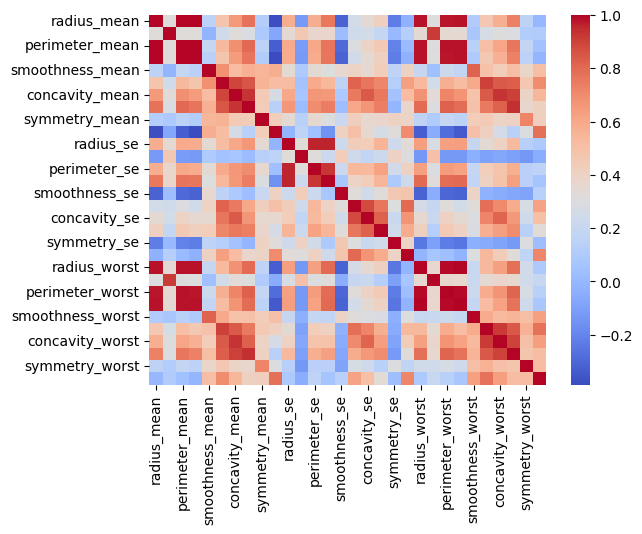

In [18]:
corr_matrix = X.corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.show()

After checking for correlation, I will get the average value of the heavily correlated columns and discard the originals

In [19]:
X['perimeter_mean/radius_mean'] = X['perimeter_mean']/X['radius_mean']
X['area_mean/radius_mean'] = X['area_mean']/X['radius_mean']
X['radius_worst/radius_mean'] = X['radius_worst']/X['radius_mean']
X['perimeter_worst/radius_mean'] = X['perimeter_worst']/X['radius_mean']

In [20]:
X = X.drop(['perimeter_mean','radius_mean','area_mean','radius_worst','perimeter_worst'],axis=1)

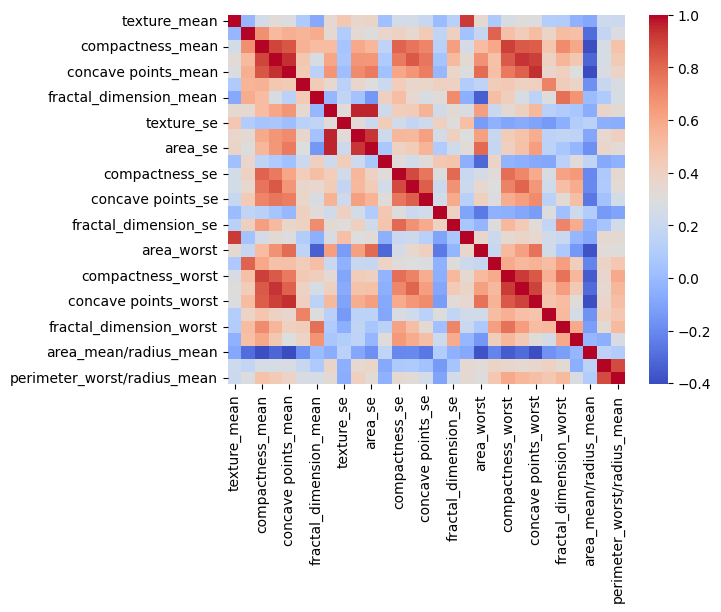

In [21]:
corr_matrix = X.corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.show()

Adding the target variable back before splitting the data to train the model

In [22]:
X.isna().value_counts()
X['diagnosis'] = Y
X.head()

,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,...,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,perimeter_mean/radius_mean,area_mean/radius_mean,radius_worst/radius_mean,perimeter_worst/radius_mean,diagnosis
0,0.046701,0.709664,0.943875,0.931423,0.926537,0.821907,0.848371,0.904983,0.356000,0.875353,...,0.886763,0.819862,0.947632,0.839369,0.816728,1.034317,0.993662,1.141355,1.176754,M
1,0.428532,0.400678,0.425554,0.515874,0.668701,0.553689,0.324283,0.695860,0.266946,0.634739,...,0.421436,0.436636,0.753279,0.485582,0.590497,0.986896,0.997353,1.019682,0.978056,M
2,0.556982,0.637861,0.740216,0.809929,0.885037,0.681710,0.446715,0.807611,0.296208,0.727950,...,0.734439,0.652509,0.898020,0.690022,0.574628,1.003438,0.994103,1.017022,0.985516,M
3,0.526919,0.879472,0.950360,0.873073,0.819797,0.880956,1.000000,0.658489,0.461990,0.639346,...,0.957318,0.807139,0.930557,1.000000,0.968123,1.108390,0.974082,1.274926,1.279284,M
4,0.275258,0.555435,0.658590,0.810936,0.816768,0.552048,0.406362,0.812354,0.293194,0.774234,...,0.455671,0.609084,0.684650,0.360256,0.434792,1.007895,0.999359,0.966935,0.962739,M


In [24]:
idx = X.isnull().any(axis=1).idxmax()

print(idx)

101


In [25]:
X = X.dropna()

Dropping the target variable

In [26]:
Y = X['diagnosis']
X = X.drop('diagnosis', axis = 1)

Splitting the data & training and testing the model

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

classification=LogisticRegression().fit(X_train,Y_train)

predictions=classification.predict(X_test)
predictions

array(['M', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'M',
       'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B'], dtype=object)

In [49]:
classification.score(X_test,Y_test)

0.9824561403508771

Checking for false negatives

In [29]:
false_negs = 0
for i, true_val in zip(predictions, Y_test):
    if (i == 'B') & (true_val == 'M'):
        false_negs += false_negs

In [30]:
false_negs_percentage = false_negs / len(predictions) * 100
print(f"Percentage of false negatives: {false_negs_percentage:.2f}%")

Percentage of false negatives: 0.00%


Applying RandomForstClassifier to try to obtain a better result

In [31]:
rfc = RandomForestClassifier(n_estimators=100, random_state=100)

In [32]:
rfc.fit(X_train, Y_train)

RandomForestClassifier(random_state=100)

In [33]:
Y_pred = rfc.predict(X_test)

In [34]:
accuracy = accuracy_score(Y_test, Y_pred)
print('Accuracy score: {:.2f}%'.format(accuracy*100))

Accuracy score: 95.61%


Getting the Weight% each variable had on the model's predictions

In [35]:
accuracy = accuracy_score(Y_test, predictions)
print(accuracy)

coefficients = pd.DataFrame({'Columns': X_test.columns,
                             'Weight %': abs(classification.coef_.flatten() / classification.coef_.sum()) * 100})

for col in X_test:
    coefficients.loc[coefficients['Columns'] == col, 'Min'] = X_test[col].min()
    coefficients.loc[coefficients['Columns'] == col, 'Max'] = X_test[col].max()

coefficients = coefficients.sort_values(by='Weight %', ascending=False)

coefficients

0.9824561403508771


,Columns,Weight %,Min,Max
4,concave points_mean,12.519956,0.000000,0.949655
18,area_worst,12.386710,0.142571,0.885923
22,concave points_worst,10.924453,0.000000,0.930557
10,area_se,10.613766,0.000000,0.862936
17,texture_worst,10.596774,0.186435,0.864547
3,concavity_mean,9.149747,0.000000,0.978798
0,texture_mean,9.006238,0.142322,0.891805
7,radius_se,8.999810,0.012164,0.934205
21,concavity_worst,7.662252,0.000000,0.846526
6,fractal_dimension_mean,7.374000,0.016542,1.000000


Doing the same without the created features since they barely had an impact on the model

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

X_train_new = X_train.drop(['area_mean/radius_mean', 'perimeter_mean/radius_mean', 'perimeter_worst/radius_mean', 'radius_worst/radius_mean'], axis = 1)
X_test_new = X_test.drop(['area_mean/radius_mean', 'perimeter_mean/radius_mean', 'perimeter_worst/radius_mean', 'radius_worst/radius_mean'], axis=1)

classification=LogisticRegression().fit(X_train_new,Y_train)

predictions=classification.predict(X_test_new)
predictions

array(['M', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'M',
       'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B'], dtype=object)

In [37]:
np.mean(X_test['concavity_mean'])

0.44255905230903225

In [38]:
classification.score(X_test_new,Y_test)

0.9824561403508771

In [39]:
X_export = data.drop(['diagnosis'], axis=1)
X_export.drop(idx, axis=0, inplace=True)

In [40]:
X_train, X_test_export, Y_train, Y_test = train_test_split(X_export, Y, test_size=0.2, random_state=100)

test_data = X_test_export
test_data['diagnosis'] = Y_test

In [41]:
new_definitions = []
for row in test_data['diagnosis']:
    if row == 'M':
        new_definitions.append('Malignant')
    else:
        new_definitions.append('Benign')

test_data['diagnosis'] = new_definitions

In [42]:
test_data.dtypes

radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst      

In [43]:
test_data.isna().value_counts()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  fractal_dimension_worst  diagnosis
False        False         False           False      False            False             False           False                False          False                   False      False       False         False    False          False           False         False              False        False                 False         False          False            False       False             False              False            False                 False           False                    False        114
dty

In [44]:
coefficients.to_csv('cancer_coefficients.csv', index=False)
test_data.to_csv('cancer_test_data_1.csv', index=False)
X.to_csv('cancer_test_data_input.csv', index=True)